## ***Housing Price Prediction***

### **Overview**

This Project Notebook covers all the necessary steps to complete the Machine Learning Task of Predicting the Housing Prices on California Housing Dataset available on scikit-learn.

---

We will perform the following steps for successfully creating a model for house price prediction:


---

[**1. Data Extraction**](#scrollTo=nlL0k3pO4XM9&line=1&uniqifier=1)


* [Import libraries](#scrollTo=hJb_1cMg5eCo&line=1&uniqifier=1ps://)
* [Import Dataset from scikit-learn](#scrollTo=kzexflx_6QUw&line=2&uniqifier=1)
* [Understanding the given Description of Data and the problem Statement](#scrollTo=7cnoPXyS61jG&line=2&uniqifier=1)
* [Take a look at different Inputs and details available with dataset](#scrollTo=nNt1_Vt1_RnY&line=2&uniqifier=1)
* [Storing the obtained dataset into a Pandas Dataframe](#scrollTo=bGtCEhK3FIZ1&line=3&uniqifier=1)


---


[**2. EDA (Exploratory Data Analysis) and Visualization**](#scrollTo=m2U76ywm_cdR)

* [Getting a closer Look at obtained Data](#scrollTo=Dq6Y5BRwAsEN)
* [Exploring different Statistics of the Data (Summary and Distributions)](#scrollTo=1pjIo1PMD9tn)
* [Looking at Correlations (between indiviual features and between Input features and Target)](#scrollTo=gnD75sLQODpj)
* [Geospacial Data / Coordinates - Longitude and Lattitude features](#scrollTo=41bF5kcXaV4f)

---

[**3. Preprocessing**](#scrollTo=UIm3ODYOOctT)
* [Dealing with Duplicate and Null (NaN) values](#scrollTo=TYop3UfkOsRJ&uniqifier=1)
* [Dealing with Categorical features (e.g. Dummy coding)](#scrollTo=o2OUtlyfQrEf&uniqifier=1)
* [Dealing with Outlier values](#scrollTo=GfZChjImRzN_&uniqifier=1)
    * [Visualization (Box-Plots)](#scrollTo=isK6y1neKY3T&uniqifier=1)
    * [Using IQR](#scrollTo=Xb2T_cA_lMhx&uniqifier=1)
    * [Using Z-Score](#scrollTo=8jYmCG4rlIs4&uniqifier=1)
* [Seperating Target and Input Features](#scrollTo=GRT14Mg9gbm-)
* [Target feature Normalization (Plots and Tests)](#scrollTo=4MR44bGfsEwA&uniqifier=1)
* [Splitting Dataset into train and test sets](#scrollTo=NOeV2gc-jYHx)
* [Feature Scaling (Feature Transformation)](#scrollTo=eHf-Wu_YjEM8)


---


[**4. Modeling**](#scrollTo=o_h7EaSlnn8v)

* [Specifying Evaluation Metric R squared (using Cross-Validation)](#scrollTo=S5g6cIZ6f6tV)
* [Model Training - trying multiple models and hyperparameters:](#scrollTo=4m6yE7RBRMiP)
    * [Linear Regression](#scrollTo=XH718tOBRf4O)
    * [Polynomial Regression](#scrollTo=scuAmJZ9ZnIA)
    * [Ridge Regression](#scrollTo=V5cG825oXASP)
    * [Decision Trees Regressor](#scrollTo=Bwvw0eOaikKE)
    * [Random Forests Regressor](#scrollTo=zmLlCtD3lRRx)
    * [Gradient Boosted Regressor](#scrollTo=o29bb8VRqCe4)
    * [eXtreme Gradient Boosting (XGBoost) Regressor](#scrollTo=5lkrCICqrhIG)
    * [Support Vector Regressor](#scrollTo=4yZoPwG0u0Wm)
* [Model Selection (by comparing evaluation metrics)](#scrollTo=IKde2tR0xib9)
* [Learn Feature Importance and Relations]()
* [Prediction](#scrollTo=DQ-R-NOz9cTv)

---

[**5. Deployment**](#scrollTo=2jk5ind1JZlq)

* [Exporting the trained model to be used for later predictions. (by storing model object as byte file - Pickling)](#scrollTo=9n67YekN7ZHE)

---
### **1. Data Extraction**

##### **Importing all Libraries needed for extracting and representing (visualizing) data** 

In [49]:
#IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#PICKLE TO STORE THE FITTED (TRAINED) OBJECTS AS BYTE FILES TO BE USED LATER 

import pickle

---

##### **Importing / Loading the California Housing Price Data from scikit-learn (sklearn)**

using the parameter as_frame = True, returns the data in the form of Pandas Dataframe

In [50]:
#IMPORTING DATA

from sklearn.datasets import fetch_california_housing  
cal_housing_dataset = fetch_california_housing(as_frame = True)

---

##### **Understanding the given Description of Data and the problem Statement.**


Using sklearn to import a dataset we obtain a Bunch object which is similar to a dictonary which contains information about the dataset and the actual data that we can use

> we can access the available keys in the Bunch Object using keys() function


In [51]:
#LIST OF KEYS AVAILABLE WITH DATASET BUNCH OBJECT

cal_housing_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

We have the following keys available in the Bunch (data) obtained from sklearn 

*   data - It contains data rows, each row corresponding to the 8 input feature values.
*   target - It contains target data rows, each value corresponds to the average house value in units of 100,000 US Dollars.
*   frame - Only present when as_frame = True. Pandas DataFrame with data and target.
*   target_names - Name of the target feature.
*   feature_names - Array of ordered feature names used in the dataset.
*   DESCR - Description of the California housing dataset. This is important to understand the meaning of features that will be used to predict the housing Prices.



---

##### **Take a look at different Inputs and details available with dataset**

We can take a look at the information avaliable in the DESCR key to get a understanding of the data such as what is shape of our dataset and learn what are different features available that we can use for predicting house prices.

In [52]:
#DESCRIPTION OF DATASET

print(cal_housing_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Using the dataset description above we can see that we have 20640 housing data points (records) and each of the housing record contains information about the houses of the block in the form of 8 input features: 

* MedInc,  HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude and Longitude

This information about the block in which house is located can be used to create a model that can predict what should be the price of a new house with different set of characteristics. 

We can also seperatly get a list of all the input features and the target feature available.

In [53]:
#PREDICTIVE (INPUT) FEATURES AVAILABLE 

print(cal_housing_dataset.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [54]:
#TARGET (OUTPUT) FEATURE

print(cal_housing_dataset.target_names)

['MedHouseVal']


the data key of the 'Bunch' object contains the input feature data values for the housing records.

In [55]:
#DATA AVAILABLE CORRESPONDING TO INPUT FEATURES FOR EACH HOUSING RECORD

print(cal_housing_dataset.data)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

We also have the coorsponding housing price for each of the records.

In [56]:
#RESULTING TARGET / OUTPUT FEATURE VALUES AVAILABLE

print(cal_housing_dataset.target)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


We can see the complete dataset (input features and targets) using the frame key of our dataset object which stores the complete housing dataset (all records and features) as a Pandas DataFrame because we imported our data using the parameter as_frame = True.

In [57]:
#THE COMPLETE DATASET AVAILABLE FOR USE 

cal_housing_dataset.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


---

##### **We can store our cal_housing_dataset.frame in a seperate new pandas variable (as a DataFrame) for easy reference later on.**

In [58]:
#STORING THE HOUSING DATA IN A SEPERATE PANDAS DATAFRAME VARIABLE

dataset = cal_housing_dataset.frame

We can view the top 5 rows of the dataset using .head() method of dataframe.

In [59]:
#VIEW TOP 5 ROWS OF DATASET

dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


---
### **2. EDA (Exploratory Data Analysis) and Visualization**

Before working with any kind of data it is important to understand it. A crucial step to achive this is the Exploratory Data Analysis (EDA): a combination of visualizations and statistical analysis (univariate, bivariate and multivariate) that helps us to better understand the data we are working with and to gain insight into their relationships. 

So, let's explore our target variable and how the other features influence it.

---
##### **Taking a closer Look at obtained Data**

we can see the overall details and information about the dataset obtained and individual feature columns using the pandas functions: 
* info() - to give a overview of type of data available.
* describe() - to get a statistical summary of available features.

In [ ]:
#USING info() TO GET OVERVIEW OF INFORMATION / STRUCTURE OF FEATURE DATA 

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


From the quick summary (overview) of dataset above - we can see that all of our features are numerical (real / floating) type and none of the features have any missing values in dataset.

---
##### **Exploring different Statistics of the Data (Summary and Distributions)**

Among our features we also have Latitude and Longitude (Geospatial features - coordinates) which we can try to specially analyze later.

So, right now we will focus on the rest of the features.

In [ ]:
#LIST OF FEATURES IN DATASET EXCLUDING Lattitude AND Longitude

features_for_EDA = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "MedHouseVal"]

In [ ]:
#SUMMARIZING STATISTICS OF THE DATASET

dataset[features_for_EDA].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,5.000010


The above statistical summary of dataset gives us insights about the distribution of individual features (how feature values vary in the dataset) 

**We can better understand the feature distributions using graphs / plots**. 

Visualizing the data distribution of the features.

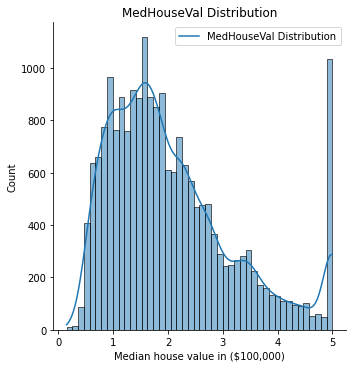

In [ ]:
#CREATING A DISTRIBUTION PLOT FOR TARGET FEATURE

sns.displot(dataset['MedHouseVal'], kde = True)

plt.title('MedHouseVal Distribution')
plt.xlabel("Median house value in ($100,000)")
plt.legend(['MedHouseVal Distribution'], loc = 'best')
plt.show()

We can clearly see how the distribution does not seem to be normal, but highly right-skewed. If we use Models like Linear Regressor to make learn for skewed data and then make predictions it will not be able to capture the correct relations in data to make accurate predicions.

Despite that, let's leave it like that for now, we'll deal with that later in the notebook.

We can also take a breif look at the distribution of Input features avaiable using plots.

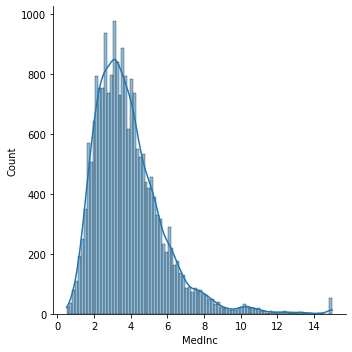

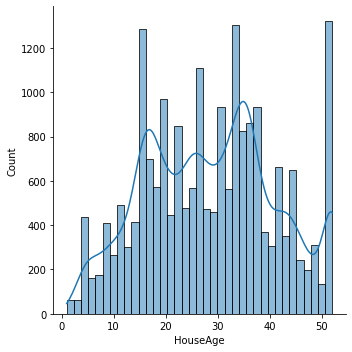

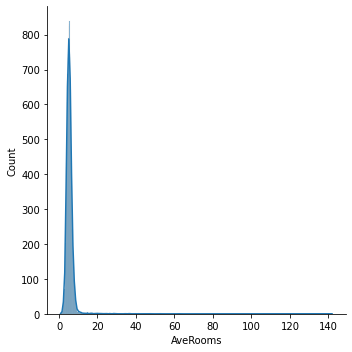

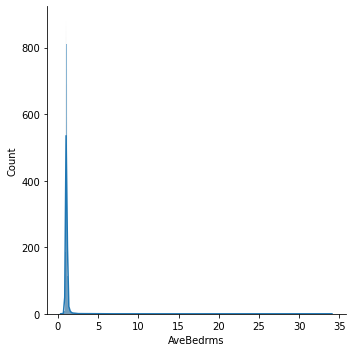

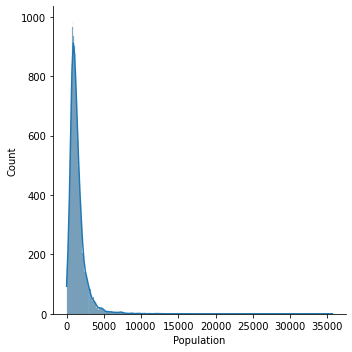

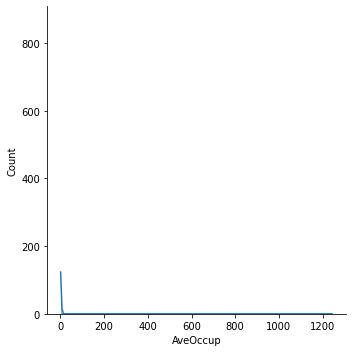

In [ ]:
#VISUALIZING THE DISTRIBUTION IN SELECTED FEATURES EXLUDING MedHouseValues

for feature in features_for_EDA[:-1]:
    sns.displot(dataset[feature], kde = True)

As we can see from the plots above most of the input features (except HouseAge) also contain highly skewed data, which can affect our models performance as it might focus too much on the outlier values and might not be able to learn the general relation and patterns in data.

So, We can try to deal with them and make our data distribution closer to normal distribution which can help in some cases to make more accurate predictions (and also generalize better).

--- 
##### **Looking at Correlations (between indiviual features and between Input features and Target)**

The correlation matrix is the best way to see all the numerical correlation between features. Let's see which are the feature that correlate most with our target variable.

We can also check to see the correlations between the features (if two features are highly corelated we can just use one of them to convey the information needed and we can remove another - feature selection)

We can use the corr() function of Pandas dataframe which returns the Pearson correlation between columns (features) by default.

In [ ]:
#corr() - CORRELATION BETWEEN COLUMNS (FEATURES) - DEFAULT = PEARSON'S COEFFICIENT
#CORRELATION MATRIX

dataset[features_for_EDA].corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,-0.023737
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,1.000000


Above we get the correlation matrix between features which tells the correlation using pearson's coefficient.

We can better understand this using heatmap visualization.

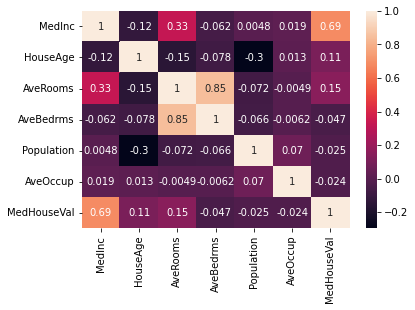

In [ ]:
#HEATMAP TO VISUALIZE CORRELATION MATRIX

sns.heatmap(dataset[features_for_EDA].corr(), annot = True)

Now that we know which feature (MedInc) correlates most with our target variable we can investigate it more in depth.

Text(0, 0.5, 'MedHouseVal')

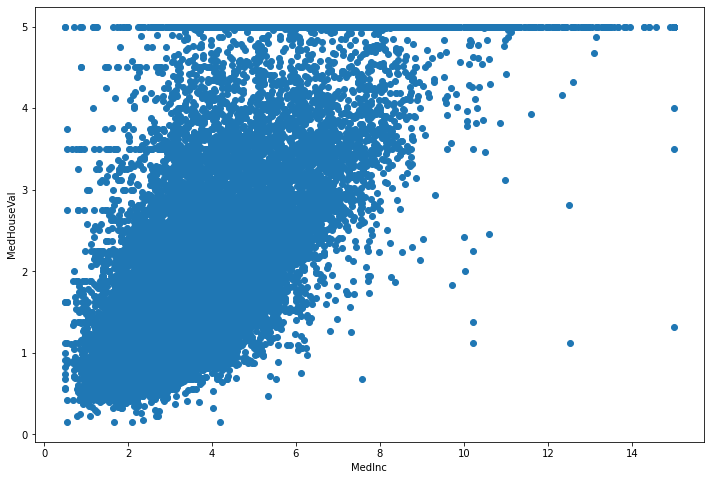

In [ ]:
#MedInc - MedHouseVal [Pearson = 0.69]

plt.figure(figsize=(12, 8))

plt.scatter(data = dataset, x = "MedInc", y = "MedHouseVal")
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")

(There exists a positive correlation) - The general pattern that we can see is that as the median income in block group (MedInc) increases the Median Price of house (MedHouseVal) increases.

---
##### **Geospacial Data (Coordinates) - Longitude and Lattitude features**

Now we can also take a look at how **Geospacial Data (coordinates) features (Longitude and Lattitude)** can help us predict the Housing prices.


Text(0.5, 1.0, 'Median house value depending on\n the spatial location')

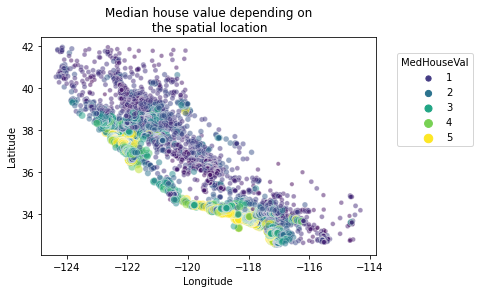

In [ ]:
#PLOT THE COORDINATES TO VISUALIZE A MAP AND HOUSING PRICES AT DIFFERENT LOCATIONS 

sns.scatterplot(data = dataset, x = "Longitude", y = "Latitude", size = "MedHouseVal", hue = "MedHouseVal", palette = "viridis", alpha=0.5)

plt.legend(title = "MedHouseVal", bbox_to_anchor = (1.05, 0.95), loc = "upper left")

plt.title("Median house value depending on\n the spatial location")

From the map above, We can see that the location of the House also gives us useful insight as to what could be the Median price of House, Houses of similar price ranges for clusters together on the map and we can use this to get an estimate price based on location.

---
### **3. Preprocessing**

Now that we have some insights about data, we need to preprocess them for the modeling part. The main steps are:

* Dealing with Duplicate and Null (NaN) values
* Dealing with Categorical features (e.g. Dummy coding)
* Dealing with Outlier values
* Data Normalization (Plots and Tests)
* Feature Scaling (Feature Transformation)
* Feature Engineering (Feature Design)


---

##### **Dealing with Duplicate and Null (NaN) values**

Many Machine Learning Models cannot work with Missing (NaN) values so we need to deal with them before training our models.

We can easily check how many values are missing in our dataset with respect to each of the input features.

In [ ]:
#CHECK NUMBER OF MISSING VALUES IN EACH OF THE FEATURES (COLUMNS)

dataset.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

There are no missing values in our dataset, as this is a practice dataset it contains no missing values but real-life datasets can have missing values, so will have to deal with them accordingly. 

---
##### **Dealing with Categorical features (e.g. Dummy coding)**

Catagorical features have data stored in a non-numerical or discrete form, and many machine learning algorithms like linear regression cannot directly work with catagorical data, so we need to Convert them into numerical type. 

We can use two methods : Ordinal Encoding and One-Hot Encoding to do so.

Now let's check if we have any catagorical features in our dataset.

In [ ]:
#CHECK DATA TYPES TO IDENTIFY CATAGORICAL FEATURES

dataset.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

All of our data (features) are of float (real number) type so we don't need to worry about Catagorical to numerical Encoding.

---

##### **Dealing with Outlier values**

There can be some outlier records present in our dataset which can be valid actual records but they do not represent the general data and are more of an exception than norm, some Machine Learning models can be quite heavily affected by the presence of these outliers, so we can try to deal with them to improve performance.

**NOTE**: We should always remove outliers from data before performing train-test split and before performing normalization (standardization).

**We can remove outliers from our dataset using Z-score OR using Interquartile range (IQR)**

    Outlier = z-score less than -3 or greater than 3. 

    Outliers = Observations > Q3 + 1.5 * IQR or Q1 – 1.5 * IQR

---
    
We can use Z-score to remove outliers from **Normally distributed** features.

And use IQR to remove outliers from features with **Skewed distribution**.

We can also use boxplots to visualize if our feature values contain Outlier values.

In [ ]:
#THE FEATURES WE ARE CONSIDERING FOR OUTLIER REMOVAL

list_of_input_features_for_outliers = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

---

###### **Detecting Outliers using Visulalization (Box Plot)**

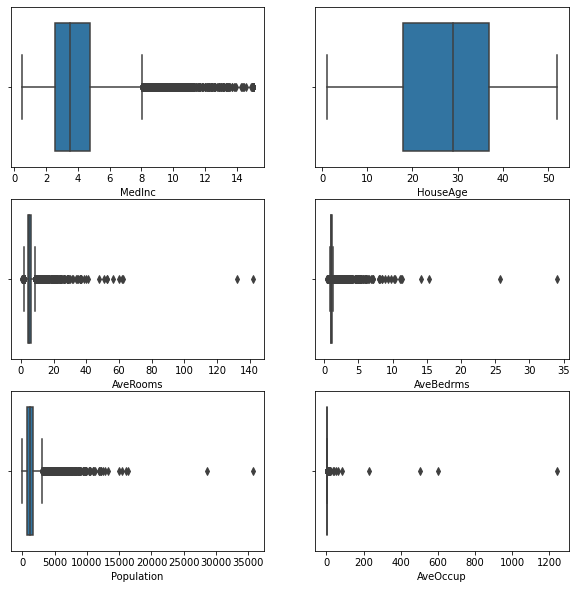

In [ ]:
#VISUALIZING FEATURE DISTRIBUTIONS AND IDENTIFING OUTLIERS USING BOX-PLOTS

fig, axes = plt.subplots(3, 2, figsize = (10, 10))

sns.boxplot(data = dataset, x = 'MedInc', ax = axes[0, 0])
sns.boxplot(data = dataset, x = 'HouseAge', ax = axes[0, 1])
sns.boxplot(data = dataset, x = 'AveRooms', ax = axes[1, 0])
sns.boxplot(data = dataset, x = 'AveBedrms', ax = axes[1, 1])
sns.boxplot(data = dataset, x = 'Population', ax = axes[2, 0])
sns.boxplot(data = dataset, x = 'AveOccup', ax = axes[2, 1])

Let's analyze the plots one by one: 
* 'MedInc' - seems to have quite a few outliers.  
* 'HouseAge' - there seems to be no outliers.
* 'AveRooms' - There seems to 2 clear Outliers and there there a few more.
* 'AveBedrms' - also have 2 clear Outliers and then there are few outliers more like 'AveRooms' 
* 'Population' - we can clearly spot 2 major outliers and there are more less extreme outliers also present.
* 'AveOccup' - Most of the data values seems to be very small but there are a few clear outliers.

--- 

###### **Using IQR**

**Detecting Outliers using IQR**

We can also see a count of how many outlier values are there in each feature, there may be also some common records in them so we deal with them together for removal.

In [ ]:
#FUNCTION TO COUNT THE OUTLIERS IN A PARTICULAR FEATURE

def count_outliers_using_IQR(feature_name):
    # IQR
    Q1 = np.percentile(dataset[feature_name], 25, interpolation = 'midpoint')
    Q3 = np.percentile(dataset[feature_name], 75, interpolation = 'midpoint')

    IQR = Q3 - Q1

    # Above Upper bound
    upper = dataset[feature_name] >= (Q3 + 1.5 * IQR)
    # Below Lower bound
    lower = dataset[feature_name] <= (Q1 - 1.5 * IQR)

    print(feature_name, " : ", len(np.where(upper)[0]) + len(np.where(lower)[0]))

In [ ]:
print("Number of Outlier values with respect to features : \n")

for feature in list_of_input_features_for_outliers:
    count_outliers_using_IQR(feature)

Number of Outlier values with respect to features : 

MedInc  :  680
HouseAge  :  0
AveRooms  :  511
AveBedrms  :  1424
Population  :  1198
AveOccup  :  711


**Removing Outliers using IQR**

Formula 


> ```
IQR = Quartile3 – Quartile1
upper = Q3 + 1.5 * IQR
lower = Q1 – 1.5 * IQR
```



In [ ]:
#FUNCTION TO CALCULATE THE MASK THAT MARKS WHICH ELEMENTS ARE OUTSIDE THE LIMITS - OUTLIERS 

def calc_elements_upper_and_lower_than_IQR(feature_name):
    Q1 = np.percentile(dataset[feature_name], 25, interpolation = 'midpoint')
    Q3 = np.percentile(dataset[feature_name], 75, interpolation = 'midpoint')

    IQR = Q3 - Q1

    # Above Upper bound
    upper_element_mask = dataset[feature_name] >= (Q3 + 1.5 * IQR)
    # Below Lower bound
    lower_element_mask = dataset[feature_name] <= (Q1 - 1.5 * IQR)

    return upper_element_mask, lower_element_mask

In [ ]:
#CREATING A MASK - MARKING ALL THE ELEMENTS THAT ARE CONSIDERED OUTLIERS i.e. OUT OF LIMITS

#LIST CORRESPONDING TO EACH FEATURE
list_of_masks_for_outlier_removal = []

for feature in list_of_input_features_for_outliers:
    x, y = calc_elements_upper_and_lower_than_IQR(feature)
    list_of_masks_for_outlier_removal.append(x)
    list_of_masks_for_outlier_removal.append(y)

#CREATING A MASK FOR OVERALL DATA RECORDS WITH RESPECT TO ALL THE FEATURES 

mask_for_outlier_removal_iqr = np.any(list_of_masks_for_outlier_removal, axis = 0)

In [ ]:
# OUTLIER POSITIONS 

list_of_records_with_outliers_iqr = np.where(mask_for_outlier_removal_iqr)

In [ ]:
#NUMBER OF TOTAL OUTLIERS

len(list_of_records_with_outliers_iqr[0])

3800

We have 3800 records that are classified as Outliers using IQR Method. 

In [ ]:
# CREATING A NEW DATASET WITH OUTLIER VALUES REMOVED USING IQR

dataset_clean_iqr = dataset.drop(list_of_records_with_outliers_iqr[0])

In [ ]:
dataset_clean_iqr.shape

(16840, 9)

Now we have a dataset that does not contain outlier values, we can try to see if this impoves the performance and genralize better.

---
###### **Using Z-Score**

Formula 

>```
Zscore = (data_point - mean) / std. deviation
```



In [ ]:
# IMPORTING LIBRARY NEEDED FOR Z-SCORE CALCULATION AND DEFINING THRESHOLD VALUE

from scipy import stats
threshold = 3

In [ ]:
# DEFINING THE FUNCTION TO CALULATE THE Z-SCORE VLAUE
# Position of the outlier
# where (z > threshold)

def calc_z_score_mask(feature_name):
    z_score = np.abs(stats.zscore(dataset[feature_name]))
    return z_score > threshold

In [ ]:
#CREATING A MASK - MARKING ALL THE ELEMENTS THAT ARE CONSIDERED OUTLIERS i.e. OUT OF LIMITS

#LIST CORRESPONDING TO EACH FEATURE
list_of_masks_for_outlier_removal_z = []

for feature in list_of_input_features_for_outliers:
    feature_mask = calc_z_score_mask(feature)
    list_of_masks_for_outlier_removal_z.append(feature_mask)

#CREATING A MASK FOR OVERALL DATA RECORDS WITH RESPECT TO ALL THE FEATURES 

mask_for_outlier_removal_z = np.any(list_of_masks_for_outlier_removal_z, axis = 0)

In [ ]:
# OUTLIER POSITIONS 

list_of_records_with_outliers_z = np.where(mask_for_outlier_removal_z)

In [ ]:
#NUMBER OF TOTAL OUTLIERS

len(list_of_records_with_outliers_z[0])

846

We have 846 records that are classified as Outliers using Z-Score Method. 

In [ ]:
# CREATING A NEW DATASET WITH OUTLIER VALUES REMOVED USING Z-SCORE

dataset_clean_z = dataset.drop(list_of_records_with_outliers_z[0])

In [ ]:
dataset_clean_z.shape

(19794, 9)

Now we have a dataset that does not contain outlier values w.r.t Z-Score, we can try to see if this impoves the performance and genralize better.

---

##### **Seperating Target and Features**

we can seperate our input features (X) and target / output feature (y)

In [60]:
y_target = dataset['MedHouseVal']
X_features = dataset.drop(['MedHouseVal'], axis = 1)

---
##### **Target feature Normalization**

In the EDA Phase, we saw that the distribution of our target variable is not a normal distribution but it is skewed which can affect the performance of many learning algorithms.

So let's try to tranform our target distribution into a normal one. To do this we use a log transformation. We will use qq-plot to see the transformation effect.

In [61]:
#IMPORTING LIBRARIES TO PERFORM NORMALIZATION 

from scipy.stats import norm
import scipy.stats as stats
import statsmodels.api as sm

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


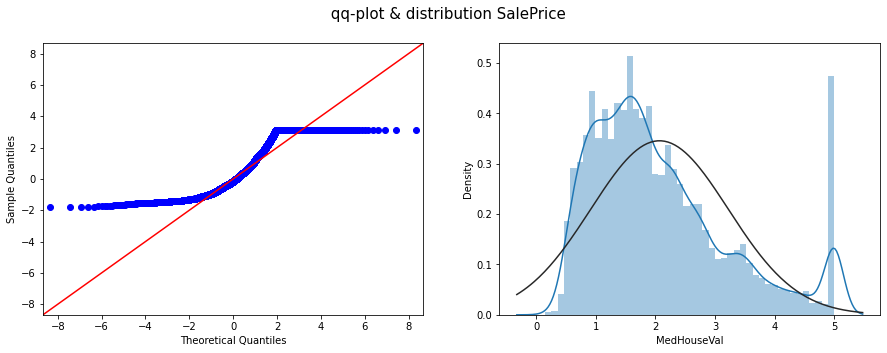

In [62]:
# MedHouseVal BEFORE TRANSFORMATION

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(y_target, stats.t, distargs=(4,), fit = True, line = "45", ax = ax[0])

sns.distplot(y_target, kde = True, hist = True, fit = norm, ax = ax[1])

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


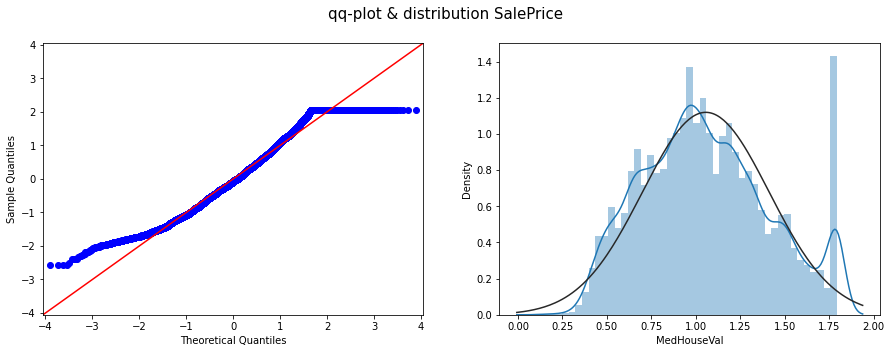

In [63]:
# MedHouseVal after transformation

y_target_log = np.log1p(y_target)

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(y_target_log, stats.t, distargs=(4,), fit = True, line = "45", ax = ax[0])
sns.distplot(y_target_log, kde = True, hist = True, fit = norm, ax = ax[1])
plt.show()

The data distribution of our target variable has more normal distributution than before, (except the part where we are limiting the price to be capped at 500,000 dollars, so more expensive houses are also labeled as 500,000 houses)

##### **Feature Engineering**

Let's create some new features combining the ones that we already have. These could help us to increase the performance of the model!

---
##### **Splitting Dataset into train and test sets**

To evaluate our model and see how well our Model Generalize to new data, we need to split the data into train and test sets. So we can test how our model performs on data never seen before.

In [64]:
# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 1)

---
##### **Feature Scaling (Feature Transformation)**

**Standard Scaling (Standardize the dataset)**

We perform the scaling on the input features so that all the features have a comparable range, and the features with larger values don't become the only prominant feature in pridicting the value, and this alos helps the learing algorithms (gradient descent) to run faster.

In [65]:
#STANDARDIZE THE DATASET

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#SCALING THE TRAIN DATA - FIT AND TRANSFORM

X_train = scaler.fit_transform(X_train)

#TRANSFORM (SCALE) TEST DATA USING SAME SCALER FITTED USED TRAIN SET   

X_test = scaler.transform(X_test)

Save our standard scaler to be used later to perform same scaling / transformation on new data, so that our model can make predictions on that.

In [66]:
pickle.dump(scaler, open("scaler.pkl", 'wb')) #here wb = write byte

---

### **4. Modeling**

##### **Specifying Evaluation Metric R squared (using Cross-Validation)**

To check the quality and accuracy of our predictions we will use the R square to evaluate our model.

we will use R square score in cross-validation square to evaluate how well our model will generalize for future unseen values

In [ ]:
#FUNCTION TO CALCULATE THE EVALUATION SCORE USING CROSS VALIDATION AND R SQAURE SCORING
from sklearn.model_selection import cross_val_score

def calculate_eval_metric(model, X, y, cv = 3):
    scores = cross_val_score(model, X, y, cv = cv, scoring = 'r2')
    print("Evaluation score on 3 cross-validation sets : ", scores)
    print("Average R squared score : ", scores.mean())
    return scores.mean()

Dictionary to store Cross - Evaluation Metrics for each Model 

In [ ]:
#DICTIONARY TO STORE CV SCORES
cv_scores = {}

---
##### **Model Training** - trying multiple models and hyperparameters

---
###### **Linear Regression**

Linear Regression can act as a baseline Model to get an understanding of how well we can perform using a simple model without much fine tuning

In [ ]:
#IMPORTING LINEAR REGRESSOR IMPLEMENTATION FROM SKLEARN

from sklearn.linear_model import LinearRegression

In [ ]:
#CREATING A MODEL OBJECT AND TRAINING 

linear_regression_model = LinearRegression()

cv_scores['linear_regression_model'] = calculate_eval_metric(linear_regression_model, X_train, y_train)

Evaluation score on 3 cross-validation sets :  [0.61733889 0.60654907 0.5905632 ]
Average R squared score :  0.6048170562554777


---
###### **Polynomial Regression**

We can try to create polynomial features inorder to learn more non-linear (complex relation ship between features)

In [117]:
#CREATING POLYNOMIAL FEATURES TO LEARN MORE COMPLEX RELATIONS BETWEEN FEATURES

from sklearn.preprocessing import PolynomialFeatures

#specify degree of 3 for polynomial regression model
#include bias=False means don't force y-intercept to equal zero

poly = PolynomialFeatures(degree = 3, include_bias = False, interaction_only = True)

#CREATE POLYNOMIAL FEATURES FOR ALL FEATURES EXCEPT THE COORDINATES
X_train_temp = X_train[:, :-2]
poly_X_train = poly.fit_transform(X_train_temp)

#CONCAT THE COORDINATE FEATURES 

poly_X_train = np.concatenate((poly_X_train, X_train[:, -2:]), axis = 1)

In [118]:
X_train.shape

(16512, 8)

In [119]:
poly_X_train.shape

(16512, 43)

In [120]:
#CREATING A MODEL OBJECT AND TRAINING 

polynomial_regression_model = LinearRegression()

cv_scores['polynomial_regression_model'] = calculate_eval_metric(polynomial_regression_model, poly_X_train, y_train)

Evaluation score on 3 cross-validation sets :  [   0.51319899 -100.3940004    -4.14467619]
Average R squared score :  -34.675159200163826


Model seems to perform very poorly. This might be a result of overfitting.

---
###### **Ridge Regression**

ridge regression is the l2 regularized Polynomial / Linear Regression - It can be helpful to reduce Overfitting 

In [126]:
#IMPORT RIDGE REGRESSION IMPLIMENTATION FROM SKLEARN

from sklearn.linear_model import Ridge

In [127]:
poly_ridge_regression_model = Ridge(alpha = 2500.0)

cv_scores['poly_ridge_regression_model'] = calculate_eval_metric(poly_ridge_regression_model, poly_X_train, y_train)

Evaluation score on 3 cross-validation sets :  [0.54003682 0.40483983 0.53270562]
Average R squared score :  0.4925274246450928


In [134]:
ridge_regression_model = Ridge(alpha = 10.0)

cv_scores["ridge_regression_model"] = calculate_eval_metric(ridge_regression_model, X_train, y_train)

Evaluation score on 3 cross-validation sets :  [0.61717619 0.60642186 0.59115334]
Average R squared score :  0.6049171307366464


---
###### **Decision Tree Regressor**

In [137]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor(random_state = 0)

cv_scores["decision_tree_model"] = calculate_eval_metric(decision_tree_model, X_train, y_train)

Evaluation score on 3 cross-validation sets :  [0.6292367  0.55985191 0.59136255]
Average R squared score :  0.593483722209434


In [142]:
#PARAMETER TUNING 

#TRYING DIFFERENT VALUES OF MAX_DEPTH 

for depth in [2, 4, 6, 8, 10, 12]:
    decision_tree_model_depth = DecisionTreeRegressor(random_state = 0, max_depth = depth)

    cv_scores["decision_tree_model_depth", depth] = calculate_eval_metric(decision_tree_model_depth, X_train, y_train)

Evaluation score on 3 cross-validation sets :  [0.44816492 0.42954666 0.44545706]
Average R squared score :  0.44105621127826095
Evaluation score on 3 cross-validation sets :  [0.57585727 0.55652765 0.57489747]
Average R squared score :  0.5690941288023251
Evaluation score on 3 cross-validation sets :  [0.65708645 0.62742877 0.6540113 ]
Average R squared score :  0.6461755081549374
Evaluation score on 3 cross-validation sets :  [0.69626366 0.66989515 0.67986131]
Average R squared score :  0.6820067052741757
Evaluation score on 3 cross-validation sets :  [0.68647535 0.66354374 0.68702813]
Average R squared score :  0.6790157396768074
Evaluation score on 3 cross-validation sets :  [0.6864275  0.63599426 0.6615508 ]
Average R squared score :  0.6613241838056646


In [143]:
cv_scores

{'linear_regression_model': 0.6048170562554777,
 'polynomial_regression_model': -34.675159200163826,
 'ridge_regression_model': 0.6049171307366464,
 'poly_ridge_regression_model': 0.4925274246450928,
 'decision_tree_model': 0.593483722209434,
 ('decision_tree_model_depth', 2): 0.44105621127826095,
 ('decision_tree_model_depth', 4): 0.5690941288023251,
 ('decision_tree_model_depth', 6): 0.6461755081549374,
 ('decision_tree_model_depth', 8): 0.6820067052741757,
 ('decision_tree_model_depth', 10): 0.6790157396768074,
 ('decision_tree_model_depth', 12): 0.6613241838056646}

from above we can observe that the max_depth value of 8 works best and generalize better than others 

---
###### **Random Forest Regressor**

In [144]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
random_forest_regressor_model = RandomForestRegressor(n_estimators = 100, max_depth = 8, random_state = 0)

cv_scores["random_forest_regressor_model"] = calculate_eval_metric(random_forest_regressor_model, X_train, y_train)

Evaluation score on 3 cross-validation sets :  [0.76016949 0.74570302 0.747854  ]
Average R squared score :  0.7512421711769676


Random forest gives the best performance out of every other model

In [146]:
#TRYING DIFFERENT VALUES FOR N_ESTIMATORS IN TRAINING OUR MODEL 

for estimators in [80, 100, 120]:
    random_forest_regressor_model_estimators = RandomForestRegressor(n_estimators = estimators, max_depth = 8, random_state = 0)

    cv_scores["random_forest_regressor_model_estimators", estimators] = calculate_eval_metric(random_forest_regressor_model_estimators, X_train, y_train)

Evaluation score on 3 cross-validation sets :  [0.75947895 0.7444624  0.74759133]
Average R squared score :  0.7505108924375108
Evaluation score on 3 cross-validation sets :  [0.76016949 0.74570302 0.747854  ]
Average R squared score :  0.7512421711769676
Evaluation score on 3 cross-validation sets :  [0.76075865 0.74723152 0.74797942]
Average R squared score :  0.7519898651687122


In [147]:
cv_scores

{'linear_regression_model': 0.6048170562554777,
 'polynomial_regression_model': -34.675159200163826,
 'ridge_regression_model': 0.6049171307366464,
 'poly_ridge_regression_model': 0.4925274246450928,
 'decision_tree_model': 0.593483722209434,
 ('decision_tree_model_depth', 2): 0.44105621127826095,
 ('decision_tree_model_depth', 4): 0.5690941288023251,
 ('decision_tree_model_depth', 6): 0.6461755081549374,
 ('decision_tree_model_depth', 8): 0.6820067052741757,
 ('decision_tree_model_depth', 10): 0.6790157396768074,
 ('decision_tree_model_depth', 12): 0.6613241838056646,
 'random_forest_regressor_model': 0.7512421711769676,
 ('random_forest_regressor_model_estimators', 80): 0.7505108924375108,
 ('random_forest_regressor_model_estimators', 100): 0.7512421711769676,
 ('random_forest_regressor_model_estimators', 120): 0.7519898651687122}

more estimators in random forest almost always result in better performance as we can confirm here, but we will stick with 100 n_estimators due to time constraints in training and because increasing estimators does not result in a major improvement.

---
###### **Gradient Boosting Regressor**

In [148]:
from sklearn.ensemble import GradientBoostingRegressor

In [149]:
gradient_boosting_model = GradientBoostingRegressor(random_state = 0, n_estimators = 100, learning_rate = 0.1, max_depth = 8)

cv_scores["gradient_boosting_model"] = calculate_eval_metric(gradient_boosting_model, X_train, y_train)

Evaluation score on 3 cross-validation sets :  [0.83041307 0.83215497 0.818246  ]
Average R squared score :  0.8269380107026487


Gradient Boosted Regressor results in best performance out of any model yet.

---
###### **eXtreme Gradient Boosting Regressor (XGBoost)**

In [150]:
import xgboost as xgb

In [153]:
xgb_model = xgb.XGBRegressor(max_depth = 8, n_estimators = 100, random_state = 0)

cv_scores["xgb_model"] = calculate_eval_metric(xgb_model, X_train, y_train)

[04:54:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Evaluation score on 3 cross-validation sets :  [0.83280003 0.83361391 0.82231405]
Average R squared score :  0.8295759945972049


---
###### **Support Vector Regression**

In [154]:
from sklearn.svm import SVR

In [155]:
svr_model = SVR()

cv_scores["svr_model"] = calculate_eval_metric(svr_model, X_train, y_train)

Evaluation score on 3 cross-validation sets :  [0.73671607 0.72975087 0.72730831]
Average R squared score :  0.7312584168808836


---
##### **Model Selection** (by comparing evaluation metrics)

Let's Take a look at the evaluation (r squared) score performance of different Models on our training data

In [156]:
cv_scores

{'linear_regression_model': 0.6048170562554777,
 'polynomial_regression_model': -34.675159200163826,
 'ridge_regression_model': 0.6049171307366464,
 'poly_ridge_regression_model': 0.4925274246450928,
 'decision_tree_model': 0.593483722209434,
 ('decision_tree_model_depth', 2): 0.44105621127826095,
 ('decision_tree_model_depth', 4): 0.5690941288023251,
 ('decision_tree_model_depth', 6): 0.6461755081549374,
 ('decision_tree_model_depth', 8): 0.6820067052741757,
 ('decision_tree_model_depth', 10): 0.6790157396768074,
 ('decision_tree_model_depth', 12): 0.6613241838056646,
 'random_forest_regressor_model': 0.7512421711769676,
 ('random_forest_regressor_model_estimators', 80): 0.7505108924375108,
 ('random_forest_regressor_model_estimators', 100): 0.7512421711769676,
 ('random_forest_regressor_model_estimators', 120): 0.7519898651687122,
 'gradient_boosting_model': 0.8269380107026487,
 'xgb_model': 0.8295759945972049,
 'svr_model': 0.7312584168808836}

from above data we can observe that the gradient boosting ('gradient_boosting' and 'xgb') models are able to provide the best performance.

We will use Gradient Boosting Regressor for making predictions on new data.

In [161]:
from sklearn.ensemble import GradientBoostingRegressor

#BOOSTING MODEL
gradient_boosting_model = GradientBoostingRegressor(random_state = 0, n_estimators = 100, learning_rate = 0.1, max_depth = 8)

#FIT THE MODEL USING THE COMPLETE TRAINING DATA FOR BETTER PERFORMANCE
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=8, random_state=0)

In [164]:
#EVALUATION SCORE (R SQUARED) ON TRAIN DATA - HOW WELL OUR MODEL PERFORMS ON TRAINING DATA
gradient_boosting_model.score(X_train, y_train)

0.9543701442570848

In [163]:
#EVALUATION SCORE ON TEST DATA TO SEE HOW WELL OUR MODEL GENERALIZE TO NEW DATA
gradient_boosting_model.score(X_test, y_test)

0.8349827250092899

---
##### **Learn Feature Importance and Relations**

In [168]:
#IMPORTANCE OF DIFFERENT FEATURES IN OUR MODEL
list_of_features = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]
feature_imp = gradient_boosting_model.feature_importances_

feature_importance = pd.DataFrame(list_of_features, columns = ["Features"])
feature_importance["Importance"] = feature_imp

feature_importance

,Features,Importance
0,MedInc,0.529809
1,HouseAge,0.044990
2,AveRooms,0.033840
3,AveBedrms,0.020110
4,Population,0.018274
5,AveOccup,0.135122
6,Latitude,0.108023
7,Longitude,0.109831


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


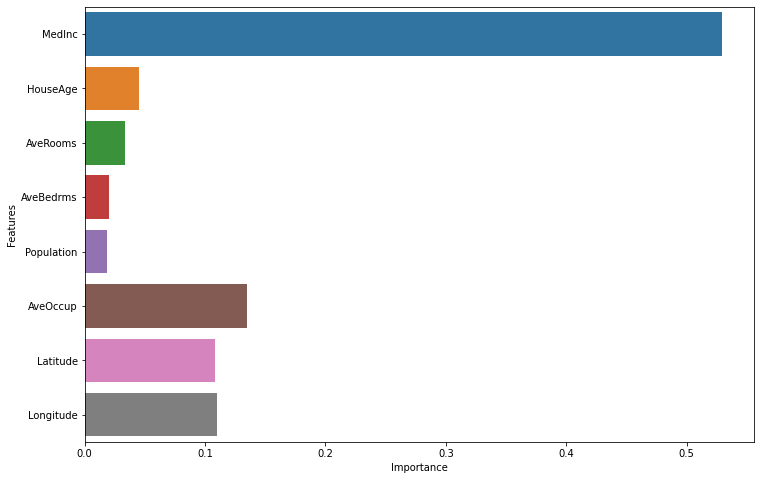

In [169]:
plt.figure(figsize = (12,8))
sns.barplot(feature_importance['Importance'],feature_importance['Features'], orient = 'h')
plt.show()

In [171]:
!pip install shap

import shap

explainer = shap.TreeExplainer(gradient_boosting_model)
shap_values = explainer.shap_values(X_train)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 13.1 MB/s eta 0:00:00


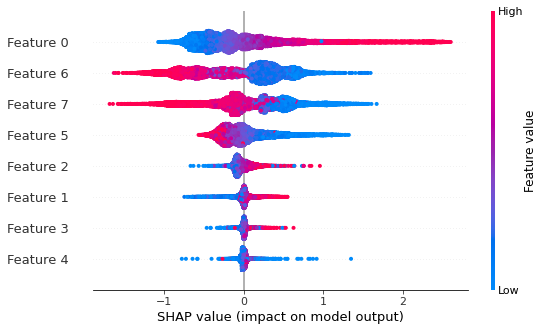

In [172]:
shap.summary_plot(shap_values, X_train)

From above analysis we can conculde that the features 'MedInc', 'Latitude', 'Longitude' and 'AveOccup' contribute significantly more in producing the final predictions that other features.

---
##### **Prediction**

first we have to standerdize the new data

In [189]:
x_pred = cal_housing_dataset.data.loc[0].values.reshape(1, -1)
x_pred

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [191]:
#STANDERDISE THE INPUT
x_pred = scaler.transform(x_pred)

X does not have valid feature names, but StandardScaler was fitted with feature names


In [197]:
#PREDICTION ON DATA 
gradient_boosting_model.predict(x_pred)

array([4.50939797])

In [193]:
#ACTUAL VALUE

cal_housing_dataset.target[0]

4.526

---
### **5. Deployment**

##### **Exporting the trained model to be used for later predictions. (by storing model object as byte file - Pickling)]**

pickle is a serialized format file - to be deployed on web servers 

In [198]:
pickle.dump(gradient_boosting_model, open("gradient_boosting_model.pkl", 'wb') ) #here wb = write byte

Load and use the pickle file (model object)

In [199]:
pickled_model = pickle.load(open("gradient_boosting_model.pkl", "rb")) #here rb = read byte

making a pridiction using the loaded pickled_model

In [200]:
## Prediction
pickled_model.predict(scaler.transform(cal_housing_dataset.data.loc[0].values.reshape(1, -1)))

X does not have valid feature names, but StandardScaler was fitted with feature names


array([4.50939797])

the prediction is same as one made before